## Decision Tree Classifier

### Wifi Localization 
https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# import graphviz

In [2]:
dataset = pd.read_csv("wifi_localization.txt", sep="\t", header=None)

In [3]:
print("shape:", dataset.shape)

shape: (2000, 8)


In [4]:
dataset = dataset.rename(columns={
    0:"wifi_1", 
    1:"wifi_2", 
    2:"wifi_3", 
    3:"wifi_4", 
    4:"wifi_5", 
    5:"wifi_6", 
    6:"wifi_7", 
    7:"room_number"
})

In [5]:
train, test = train_test_split(dataset, test_size=0.3)

In [6]:
print("train.shape:", train.shape)
print("test.shape", test.shape)

train.shape: (1400, 8)
test.shape (600, 8)


In [7]:
# train.describe()

In [8]:
# train["room_number"].count()

In [9]:
# type(train)
feature_set = ["wifi_1", "wifi_2", "wifi_3", "wifi_4", "wifi_5", "wifi_6", "wifi_7"]
target_set = ["room_number"]
X_train = train[feature_set]
Y_train = train[target_set]

In [10]:
print("X_train.shape", X_train.shape)
print("Y_train.shape", Y_train.shape)

X_train.shape (1400, 7)
Y_train.shape (1400, 1)


In [11]:
clf = DecisionTreeClassifier(criterion = "entropy")

In [12]:
clf = clf.fit(X_train, Y_train)

In [13]:
X_test = test[feature_set]
Y_test = test[target_set]

In [14]:
Y_predicted = clf.predict(X_test)

In [15]:
print("Accuracy is:", accuracy_score(Y_test, Y_predicted) * 100)

Accuracy is: 96.83333333333334


In [16]:
text_representation = export_text(clf)
print(text_representation)

|--- feature_0 <= -54.50
|   |--- feature_4 <= -58.50
|   |   |--- feature_3 <= -56.50
|   |   |   |--- feature_4 <= -64.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  -64.50
|   |   |   |   |--- feature_6 <= -85.50
|   |   |   |   |   |--- feature_1 <= -55.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  -55.50
|   |   |   |   |   |   |--- feature_0 <= -63.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  -63.00
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_6 >  -85.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  -56.50
|   |   |   |--- feature_2 <= -46.50
|   |   |   |   |--- feature_0 <= -56.50
|   |   |   |   |   |--- feature_2 <= -53.00
|   |   |   |   |   |   |--- feature_1 <= -57.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_1 >  -57.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  -53.00


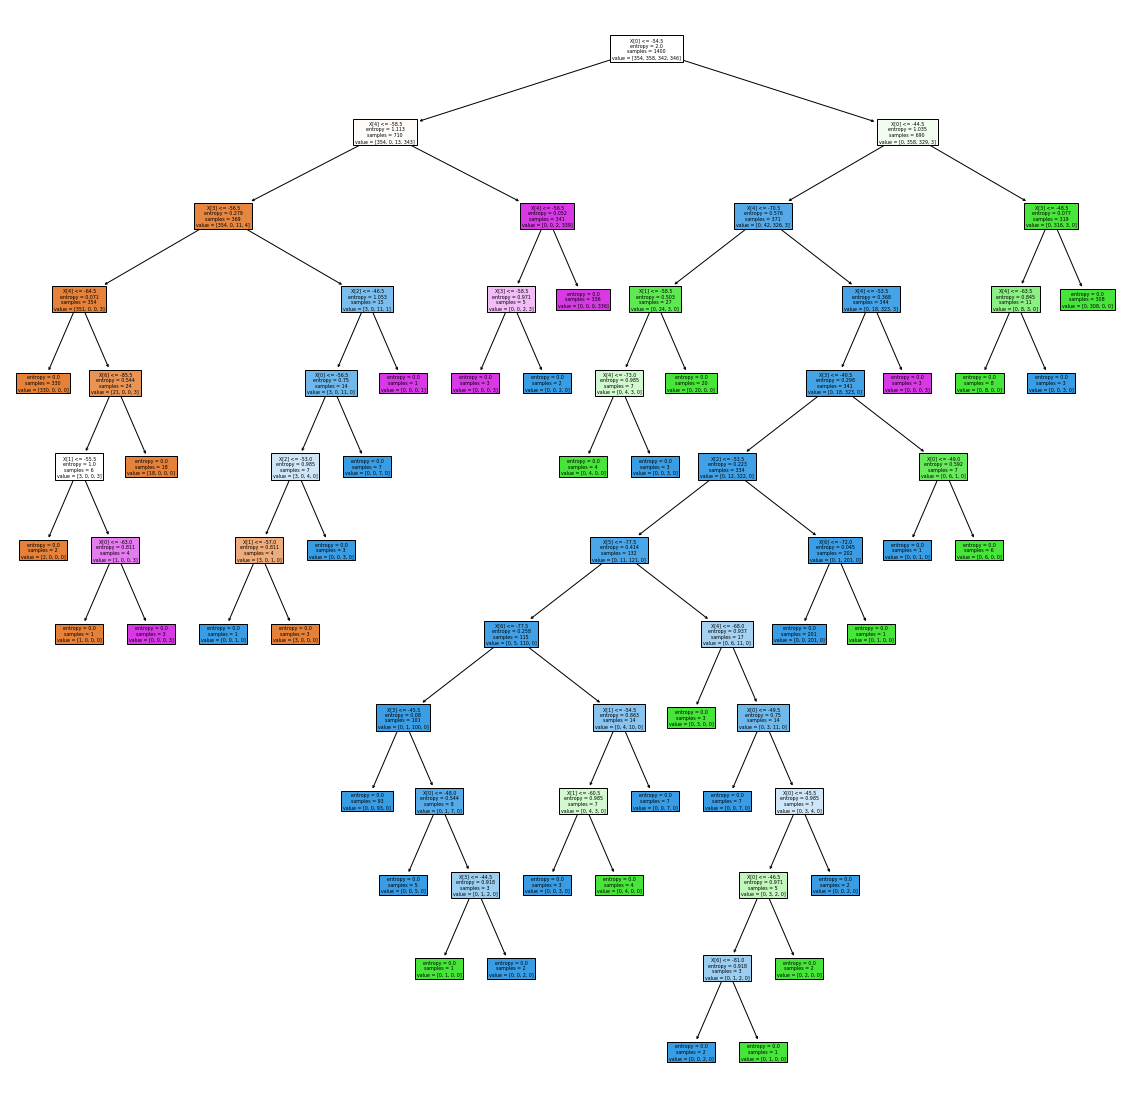

In [17]:
fig = plt.figure(figsize=(20,20))
_ = plot_tree(clf, filled = True)

## THE END